In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install seqeval==0.0.5
!pip install tensorflow==1.14.0
!pip install keras==2.2.4

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-nrgatupg
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-nrgatupg
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=b1fa5beff7faf7161fbe81d520f47ab948c52114b55df46de4c92454c9fc9496
  Stored in directory: /tmp/pip-ephem-wheel-cache-_7pppo54/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib
     |████████████████████████████████| 109.3 MB 34 kB/s 
     |████████████████████████████████| 3.1 MB 50.3 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |████████████████████████████████| 488 kB 43.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboar

In [2]:
import pandas as pd
import numpy as np
import re

import tensorflow as tf
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

from nltk import word_tokenize

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
data = pd.read_csv('/content/CV Parser - Labeled Data (1).csv')
data.tail()

,cv,line,tag
36456,533.pdf,WORRKING SPRITE,O
36457,533.pdf,"I’d like eager to learn, good team working and...",O
36458,533.pdf,solving problem.,O
36459,533.pdf,Strongly skill Analyst and Logical thinking.,O
36460,533.pdf,Funny and tolerate high work pressure.,O


In [4]:
def decontracted(phrase):
    # specific
    phrase = re.sub(":|-\s+|,|–\s+|-|\||\/", " ", phrase)
    phrase = re.sub(r"â€|™|“|”|;|ü|\xad|\xa0|\u200b|·|∙|�|●|�|§|•|!|▪|©|\?|\]|\[|\)|\(", "", phrase)
    phrase = re.sub(r"[^\w\s]", " ", phrase)
    
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    phrase = re.sub(r"\bhcmc\b", "ho chi minh city ", phrase)
    phrase = re.sub(r"\bhcm\b", "ho chi minh ", phrase)
    phrase = re.sub(r"\bbs\b ", "bachelor of ", phrase)
    phrase = re.sub(r"r’s", "r of", phrase)
    phrase = re.sub(r"\’s", " of", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " of", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\bim\b", "i am ", phrase)
    phrase = re.sub(r"\bi’m\b", "i am ", phrase)
    
    return phrase

line = []
for i in data['line']:
    regex = decontracted(str(i).lower())
    line.append(regex.strip())

line

['trinh dinh phuc',
 'curriculum vitae',
 '16 kha van can str',
 'linh dong  thu duc  ho chi minh city',
 'h',
 '0121 658 5084',
 'b',
 'phuccoi996 gmail com',
 'dob  march 16  1996',
 'education',
 '2014 2018 bachelor s degree of information technology department of computer science',
 'telecommunications university tcu  nha trang  khanh hoa  vietnam',
 'cgpa  3 35 4 via 204 credits',
 'thesis  pneumonia diagnosis using lung s xray with depthwise convolution',
 'final grade  91 100 top of the class',
 'internship',
 '03 2018  machine learning engineer intern part time intern cbd robotics  125 dong van',
 'cong str  district 2  ho chi minh city  vietnam',
 'work learn about and work on the technical side with focus on data analytics with using machine',
 'learning  deep learning',
 'mini projects house price prediction  amazon reviews  airline arrivals  boston marathon  author',
 'classification',
 '04 2018  7 2018 data analyst intern full time intern devnet  101b mai xuan thuong  vinh

In [6]:
import gensim

wv = KeyedVectors.load("/content/word2vec_v8.bin", mmap='r')
# w_v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/word_vectors/GoogleNews-vectors-negative300.bin', binary=True)

In [7]:
import nltk
nltk.download('punkt')

def sent2idx(x):
    xidx = []
    for w in word_tokenize(x):
        if w in wv.key_to_index:
            xidx.append(wv.key_to_index[w])
    return np.array(xidx)

# def sent2vec(x):
#     xidx = []
#     sent_vec = np.zeros(300)
#     cnt = 0
#     for w in word_tokenize(x):
#         if w in wv:
#             vec = wv[w]
#             sent_vec = sent_vec + vec
#             cnt = cnt+1
#     if cnt != 0:
#         sent_vec = sent_vec / cnt
#     xidx.append(sent_vec)
#     return xidx

s2v = []
for i in line:
    s2v.append(sent2idx(i))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
for i, x in enumerate(s2v):
    if len(x) < 64:
        s2v[i] = np.hstack((x, np.zeros(64-len(x))))
X = np.array(s2v)
X[0]

array([1363.,  575., 1155.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.])

In [9]:
tag = data['tag']

tags = list(set(data['tag'].to_list()))
tag2idx = {tok:idx for  idx, tok in enumerate(tags)}
idx2tag = {idx:tok for  idx, tok in enumerate(tags)}

# tag2idx = {'I-W': 0, 'nan': 1, 'B-SU': 2, 'I-S': 3, 'B-I': 4, 'I_I': 5, 'B-S': 6, 'I-I': 7, 'I-E': 8, 'I-SU': 9, 'B-E': 10, 'B-Su': 11, 'O': 12, 'B-W': 13} 
# idx2tag = {0: 'I-W', 1: 'nan', 2: 'B-SU', 3: 'I-S', 4: 'B-I', 5: 'I_I', 6: 'B-S', 7: 'I-I', 8: 'I-E', 9: 'I-SU', 10: 'B-E', 11: 'B-Su', 12: 'O', 13: 'B-W'} 
# idx2tag = {0: 'O', 1: 'I-W', 2: 'I-S', 3: 'B-E', 4: 'B-I', 5: 'I-I', 6: 'B-S', 7: 'B-SU', 8: 'I-E', 9: 'B-W', 10: 'I-SU'}
# tag2idx = {'O': 0, 'I-W': 1, 'I-S': 2, 'B-E': 3, 'B-I': 4, 'I-I': 5, 'B-S': 6, 'B-SU': 7, 'I-E': 8, 'B-W': 9, 'I-SU': 10}
n_tags = len(tag2idx)
print(tag2idx, '\nn_tag:' ,n_tags)

{'I-S': 0, nan: 1, 'B-Su': 2, 'B-W': 3, 'B-SU': 4, 'I_I': 5, 'I-W': 6, 'O': 7, 'B-E': 8, 'B-S': 9, 'I-E': 10, 'I-SU': 11, 'B-I': 12, 'I-I': 13} 
n_tag: 14


In [10]:
y_tag = list(data['tag'].to_list())
yidx = []
for w in y_tag:
    if w in tag2idx:
        yidx.append([tag2idx[w]])
# y = np.array(yidx)
y = yidx
np.array(y).shape, y[0]

((36461, 1), [12])

In [11]:
for i, x in enumerate(y):
    if len(x) < 64:
        y[i] = np.hstack((x, np.zeros(64-len(x))))
y = np.array(y)
y.shape, y[0]

((36461, 64),
 array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [12]:
y = [tf.keras.utils.to_categorical(i, num_classes=n_tags) for i in y]
y = np.array(y)
y.shape, y[0]

((36461, 64, 14),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, np.array(y_train).shape, np.array(y_test).shape

((25522, 64), (10939, 64), (25522, 64, 14), (10939, 64, 14))

In [14]:
X_train[0], np.array(y_train[0])

(array([493.,  33.,  14.,   8., 173.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0

# Build model

In [15]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

import keras as k
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy

input = Input(shape=(64,))

# Embedding Layer
model = Embedding(input_dim=X.shape[0], output_dim=64, input_length=64)(input)

# model = Bidirectional(LSTM(units=64, 
#                            return_sequences=True,  
#                            recurrent_dropout=0.1,
#                            activation='tanh'), merge_mode='sum')(model)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=64, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5,
                           kernel_initializer=k.initializers.he_normal()))(model)

# model = Bidirectional(LSTM(units=64, 
#                            return_sequences=True, 
#                            dropout=0.5, 
#                            recurrent_dropout=0.5,
#                            kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=64, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5,
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)

# CRF Layer
crf = CRF(n_tags)

out = crf(model)  # output
model = Model(input, out)

#Optimiser 
# adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss=crf_loss, metrics=[crf_viterbi_accuracy, 'acc'])

model.summary()

Using TensorFlow backend.




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 64, 64)            2333504   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64, 128)           66048     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64, 64)            49408     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 64, 14)            910       
______________________________________________________________

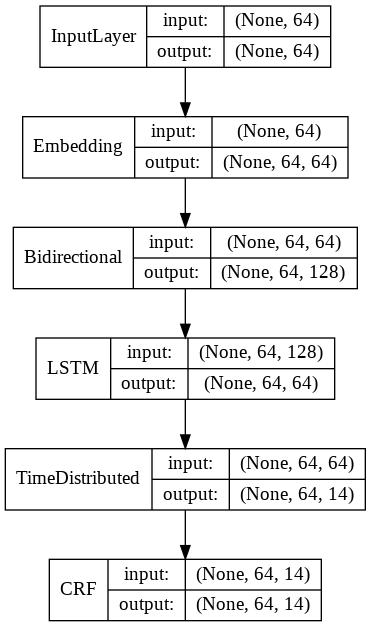

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [17]:
hist = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.3)

Train on 17865 samples, validate on 7657 samples
Epoch 1/20
17865/17865 [==============================] - 74s 4ms/step - loss: 0.7886 - crf_viterbi_accuracy: 0.9060 - acc: 0.9865 - val_loss: 0.1465 - val_crf_viterbi_accuracy: 0.9864 - val_acc: 0.9864
Epoch 2/20
17865/17865 [==============================] - 70s 4ms/step - loss: 0.0965 - crf_viterbi_accuracy: 0.9865 - acc: 0.9865 - val_loss: 0.0729 - val_crf_viterbi_accuracy: 0.9864 - val_acc: 0.9864
Epoch 3/20
17865/17865 [==============================] - 70s 4ms/step - loss: 0.0650 - crf_viterbi_accuracy: 0.9865 - acc: 0.9865 - val_loss: 0.0583 - val_crf_viterbi_accuracy: 0.9864 - val_acc: 0.9864
Epoch 4/20
17865/17865 [==============================] - 73s 4ms/step - loss: 0.0546 - crf_viterbi_accuracy: 0.9865 - acc: 0.9865 - val_loss: 0.0507 - val_crf_viterbi_accuracy: 0.9864 - val_acc: 0.9864
Epoch 5/20
17865/17865 [==============================] - 71s 4ms/step - loss: 0.0478 - crf_viterbi_accuracy: 0.9867 - acc: 0.9865 - val_lo

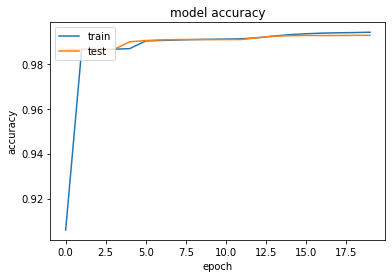

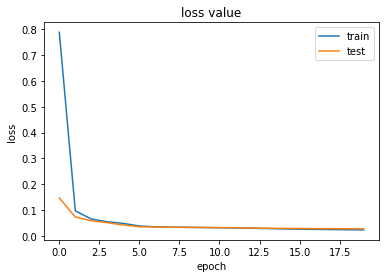

In [18]:

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(hist.history['crf_viterbi_accuracy'])
plt.plot(hist.history['val_crf_viterbi_accuracy'])
# plt.plot(hist.history['acc'])
# plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("model_accuracy_lr.png")
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss value')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig("model_loss_lr.png")
plt.show()

In [ ]:
model.save('bilstm_crf_v3.h5')

In [ ]:
np.array([X[0]])

array([[1458,  633, 1342,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [ ]:
p = model.predict(np.array([X[0]]))
p = np.argmax(p)
# p = np.argmax(p, axis=-1)
p.shape, p, idx2tag[p]

((), 12, 'I-I')

In [19]:
import re

df = pd.DataFrame(columns=['cv', 'line'])
test_line = []

nfile = '/content/drive/MyDrive/Colab Notebooks/txt_cv_1-533/003.txt'
with open(nfile, 'r', encoding = 'utf-8') as f:
    raw = f.readlines()
    for i in raw:
        clean = decontracted(str(i).lower())
        test_line.append(clean.strip())
    
test_data = []
for i in test_line:
    test_data.append(sent2idx(i))

for i, x in enumerate(test_data):
    if len(x) < 64:
        test_data[i] = np.hstack((x, np.zeros(64-len(x))))


#p = model.predict(np.array([test_data[i]]))
#p = np.argmax(p, axis=-1)
# Visualization
print("{:90}||{:5}".format("sentences", "pre tag"))
print(100 * "=")
for i, w in zip(test_data, test_line):
    p = model.predict(np.array([i]))
    p = np.argmax(p)
    print("{:90}: {:5}".format(w, idx2tag[p]))

FileNotFoundError: ignored

In [21]:
i = np.random.randint(0,X_test.shape[0]) # choose a random number between 0 and len(X_te)
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))
# Visualization
print("{:50}||{:5}||{}".format("Word", "True", "Pred"))
print(65 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:50}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

Sample number 7508 of 10939 (Test Set)
Word                                              ||True ||Pred


NameError: ignored